In [1]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def find_marker_coordinates(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Setup SimpleBlobDetector parameters
    params = cv2.SimpleBlobDetector_Params()

    # Change thresholds
    params.minThreshold = 0
    params.maxThreshold = 255

    # Filter by Area.
    params.filterByArea = True
    params.minArea = 10  # Adjust this value according to the size of the marker

    # Create a detector with the parameters
    detector = cv2.SimpleBlobDetector_create(params)

    # Detect blobs
    keypoints = detector.detect(image)

    # Convert keypoints to a format that Matplotlib can use
    # Extracting the point positions for plotting
    points = np.array([kp.pt for kp in keypoints]).astype(np.int32)

    # Plot the image
    fig, ax = plt.subplots()
    ax.imshow(image, cmap='gray')
    
    # Plot keypoints
    if points.size:
        ax.scatter(points[:, 0], points[:, 1], color='red', s=40)  # s is the size of points

    # Show the image with keypoints
    plt.axis('off')  # Hide axes
    plt.show()

    # Get marker coordinates
    if keypoints:
        marker_keypoint = keypoints[0]
        marker_x = int(marker_keypoint.pt[0])
        marker_y = int(marker_keypoint.pt[1])
        return marker_x, marker_y
    else:
        return None, None

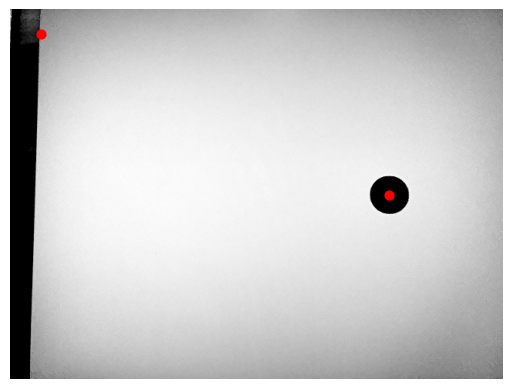

marker 1 coordinates: (492, 240)


In [3]:
# Find marker coordinates in both images
marker1_x, marker1_y = find_marker_coordinates('disparity_images/image_left.png')
print(f'marker 1 coordinates: {(marker1_x, marker1_y)}')
# marker2_x, marker2_y = find_marker_coordinates('disparity_images/image_2.png')

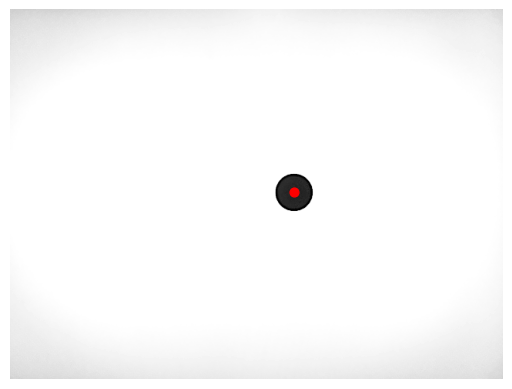

marker 2 coordinates: (368, 237)


In [4]:
# Find marker coordinates in both images
marker2_x, marker2_y = find_marker_coordinates('disparity_images/image_right.png')
print(f'marker 2 coordinates: {(marker2_x, marker2_y)}')


In [5]:
# Display marker coordinates
if marker1_x is not None and marker1_y is not None:
    print("Marker coordinates in image 1: ({}, {})".format(marker1_x, marker1_y))
else:
    print("Marker not found in image 1.")

if marker2_x is not None and marker2_y is not None:
    print("Marker coordinates in image 2: ({}, {})".format(marker2_x, marker2_y))
else:
    print("Marker not found in image 2.")

Marker coordinates in image 1: (492, 240)
Marker coordinates in image 2: (368, 237)


In [6]:
# Calibration Matrix from performing camera calibration in HW1:
calibration_matrix = np.array([
    [442.5930392, 0, 294.09394662],
    [0, 441.27421154, 242.95287843],
    [0, 0, 1]
])

# Extract the focal length from the calibration matrix
# Assuming a hypothetical focal length (in pixels)
focal_length = calibration_matrix[0, 0]  # fx

In [7]:
# Convert T from cm to pixels
print('Actual Depth is: 27.5 cm')
T = 7.5  # Horizontal translation in cm

# Calculate the disparity (horizontal difference) between the marker's positions in the two images
disparity = abs(marker2_x - marker1_x)

# Calculate the distance D using stereo-vision theory (assuming ideal conditions)
# We can use the formula: D = (f * T) / disparity
# Where f is the focal length of the camera (which we assume to be constant for simplicity)

if disparity == 0:
    print("Disparity is zero. The object might be at infinity, or an error in detection occurred.")
else:
    # Calculate the distance D using stereo-vision theory
    # D = (f * T) / disparity
    D = (focal_length * T) / disparity
    print("Depth D estimated using stereo-vision theory: {:.2f} cm".format(D))

Actual Depth is: 27.5 cm
Depth D estimated using stereo-vision theory: 26.77 cm
